## Solar Readings - Data Visualization

Data taken from home solar panel since it was turned on after installation on 9/1/2015 until current date

Importing required packages

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

Reading in solar readings csv file

In [5]:
df = pd.read_csv("SolarReadings-2020-03-29.csv")

Checking on data with df.head()

In [12]:
df_date.shape

(1672, 3)

Getting shape of dataframe

In [6]:
df.head()

,Date,ID,Net Kwh,DailyGenerations
0,9/1/2015,1,12,12
1,9/2/2015,2,24,12
2,9/3/2015,3,35,11
3,9/4/2015,4,46,11
4,9/5/2015,5,58,12


### 1. Plotting the Average Daily Generation by Month

Data wrangling the date column

In [9]:
df_date = df['Date'].str.split("/", n=2, expand=True)
df_date[0] = df_date[0].apply('{:0>2}'.format)
df_date[1] = df_date[1].apply('{:0>2}'.format)
df_date['monthDay']=df_date[0]
df_date['daily'] = df['DailyGenerations']
df_date=df_date.drop([0,1], axis=1)
df_date.columns.values[0]='year'
df_date.head(5)

,year,monthDay,daily
0,2015,09,12
1,2015,09,12
2,2015,09,11
3,2015,09,11
4,2015,09,12


Grouping by date for daily average per month

In [11]:
df_daily_average = df_date.groupby(['monthDay'], as_index=False).mean()
df_daily_average.head(12)

,monthDay,daily
0,01,4.380645
1,02,6.936620
2,03,7.758170
3,04,10.000000
4,05,10.822581
5,06,12.133333
6,07,12.000000
7,08,10.483871
8,09,9.573333
9,10,8.000000


Getting shape of new dataframe

In [13]:
df_daily_average.shape

(12, 2)

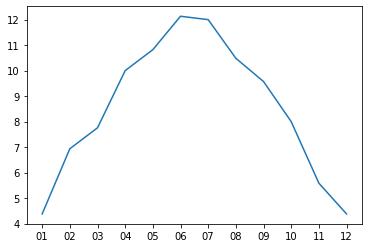

In [15]:
%matplotlib inline
plt.plot(df_daily_average['monthDay'],df_daily_average['daily'])

### Plotting the Total generation per Year

Data wrangling

In [16]:
df['Year'] = df['Date'].str[-4:]
df_year_daily = df.groupby(['Year'], as_index=False).sum()
df_year_daily.head(6)

,Year,ID,Net Kwh,DailyGenerations
0,2015,7503,64043,892
1,2016,111813,919165,3173
2,2017,244915,2049880,3065
3,2018,378140,3176235,3071
4,2019,511365,4282289,3044
5,2020,144892,1203554,585


Plotting bar chart

Text(0.5, 1.0, 'Yearly Generations')

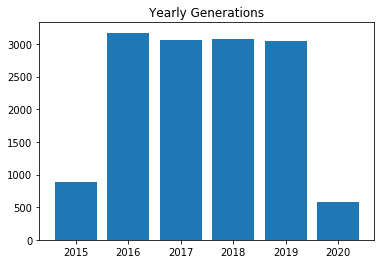

In [17]:
plt.bar(df_year_daily['Year'],df_year_daily['DailyGenerations'])
plt.title('Yearly Generations')

### Monthly Total Generation By Year

Data wrangling

In [24]:
df_date = df['Date'].str.split("/", n=2, expand=True)
df_date[0] = df_date[0].apply('{:0>2}'.format)
df_date[1] = df_date[1].apply('{:0>2}'.format)
df_date.head()


df_date['monthDay']=df_date[0]
df_date['daily'] = df['DailyGenerations']
df_date=df_date.drop([0,1], axis=1)

df_date.columns.values[0]='year'
df_year_2015 = df_date[df_date['year']=="2015"]
df_year_2016 = df_date[df_date['year']=="2016"]
df_year_2017 = df_date[df_date['year']=="2017"]
df_year_2018 = df_date[df_date['year']=="2018"]
df_year_2019 = df_date[df_date['year']=="2019"]
df_year_2020 = df_date[df_date['year']=="2020"]

df_daily_average1 = df_year_2015.groupby(['monthDay'], as_index=False).sum()
df_daily_average2 = df_year_2016.groupby(['monthDay'], as_index=False).sum()
df_daily_average3 = df_year_2017.groupby(['monthDay'], as_index=False).sum()
df_daily_average4 = df_year_2018.groupby(['monthDay'], as_index=False).sum()
df_daily_average5 = df_year_2019.groupby(['monthDay'], as_index=False).sum()
df_daily_average6 = df_year_2020.groupby(['monthDay'], as_index=False).sum()

Plotting line graph

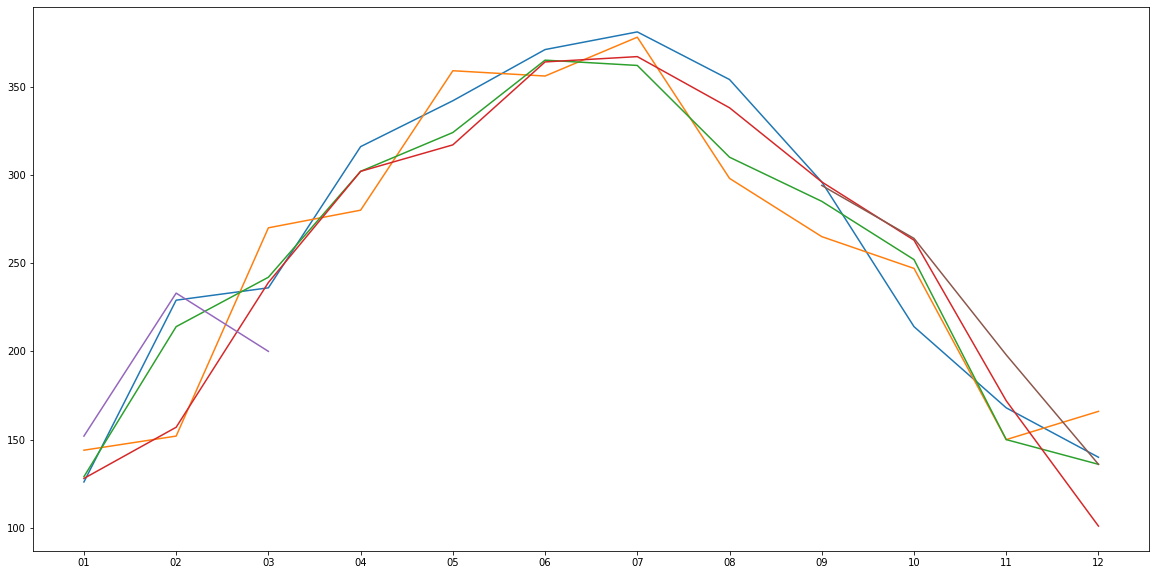

In [26]:
plt.figure(figsize=(20,10))

plt.plot(df_daily_average2['monthDay'],df_daily_average2['daily'])
plt.plot(df_daily_average3['monthDay'],df_daily_average3['daily'])
plt.plot(df_daily_average4['monthDay'],df_daily_average4['daily'])
plt.plot(df_daily_average5['monthDay'],df_daily_average5['daily'])
plt.plot(df_daily_average6['monthDay'],df_daily_average6['daily'])
plt.plot(df_daily_average1['monthDay'],df_daily_average1['daily'])